In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr


url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/05_eda_categorical/airbnb_eda/Data/AB_NYC_2019.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(url)

# Show first few rows
print("✅ Dataset Loaded Successfully!\n")
print(df.shape)
display(df.head())

✅ Dataset Loaded Successfully!

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [76]:

print(df.info(), df.isnull().mean()*100)

# Clean price (remove dollar signs if exists), convert to numeric
df['price'] = df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

# Outlier removal
df = df[df['price'] < df['price'].quantile(0.99)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<Figure size 1000x600 with 0 Axes>

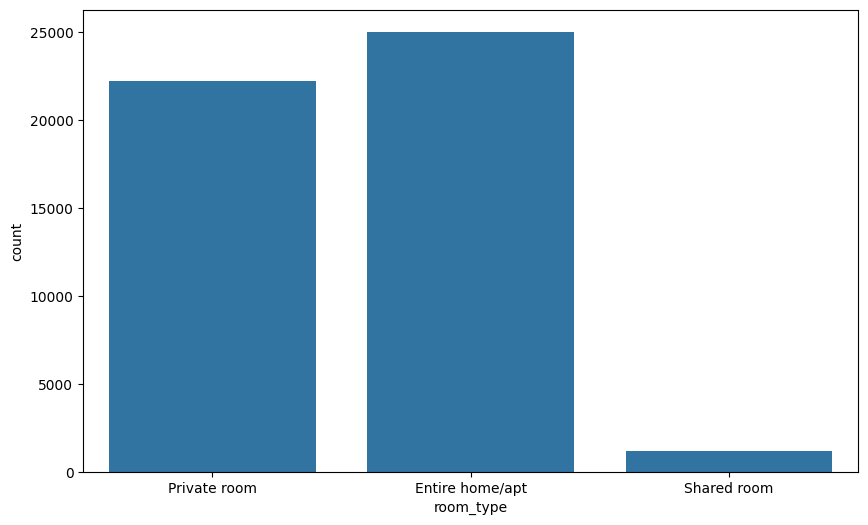

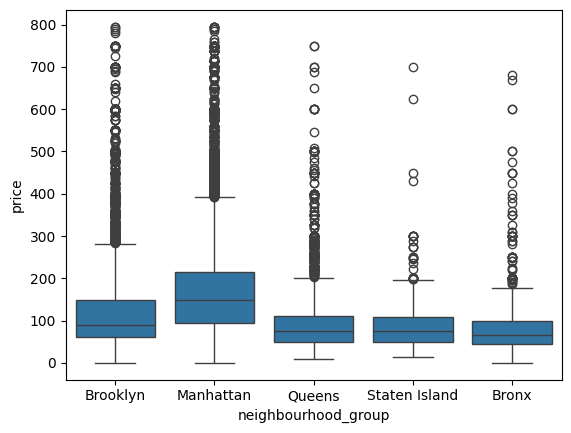

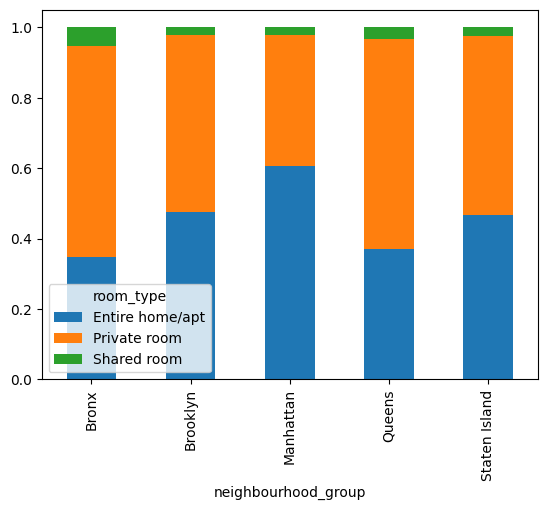

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt # Often used with seaborn for plotting

# Missing data handling
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Show top hosts
top_hosts = df['host_id'].value_counts().head(10)

# Categorical plots
sns.countplot(x='room_type', data=df)
plt.show() # Show the plot

sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.show() # Show the plot

# Cross-tabulation
ct = pd.crosstab(df['neighbourhood_group'], df['room_type'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.show() # Show the plot

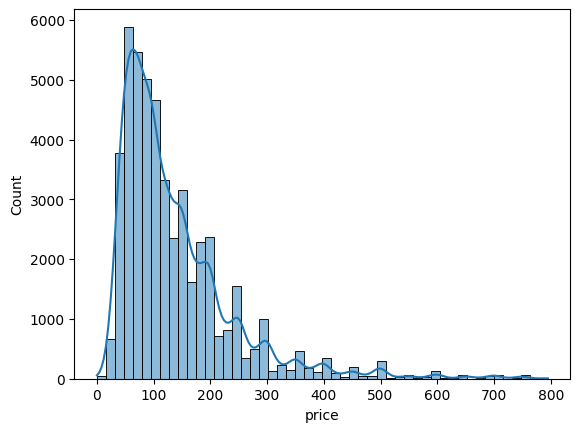

In [91]:
# Price segments using pd.cut()
bins = [0.0, 100.0, 200.0, 300.0, np.inf]
labels = ['Budget', 'Mid', 'Premium', 'Luxury']
df['price_segment'] = pd.cut(df['price'], bins=bins, labels=labels)

# Distribution plots
sns.histplot(df['price'], bins=50, kde=True)
plt.show()


/tmp/ipython-input-2862753216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_segment', data=df, palette="plasma")


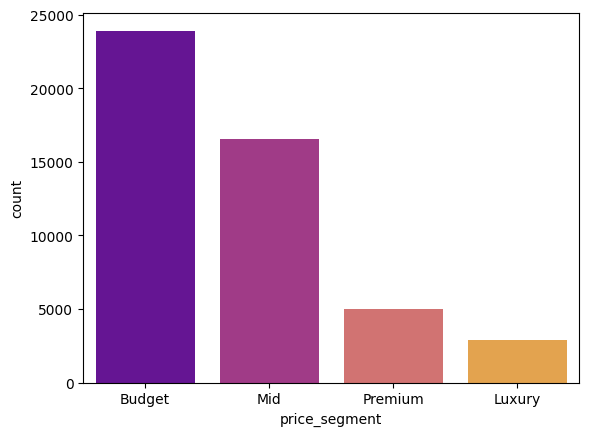

In [90]:
sns.countplot(x='price_segment', data=df, palette="plasma")
plt.show()

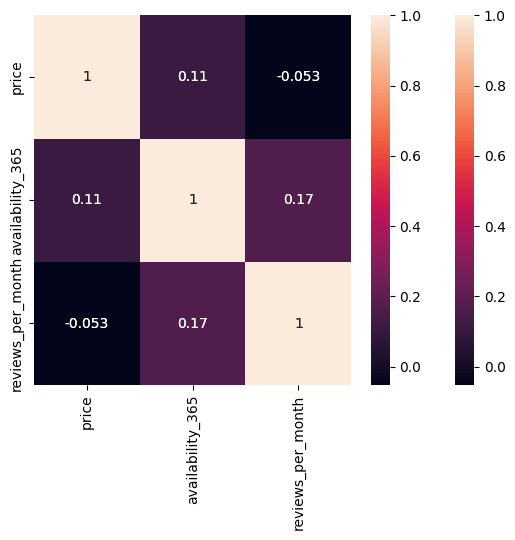

In [93]:
# Correlation
corr = df[['price', 'availability_365', 'reviews_per_month']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [58]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [94]:
sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

/tmp/ipython-input-3156036430.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['neighbourhood_group'], palette="plasma")


Text(0.5, 1.0, 'Neighbourhood Group')

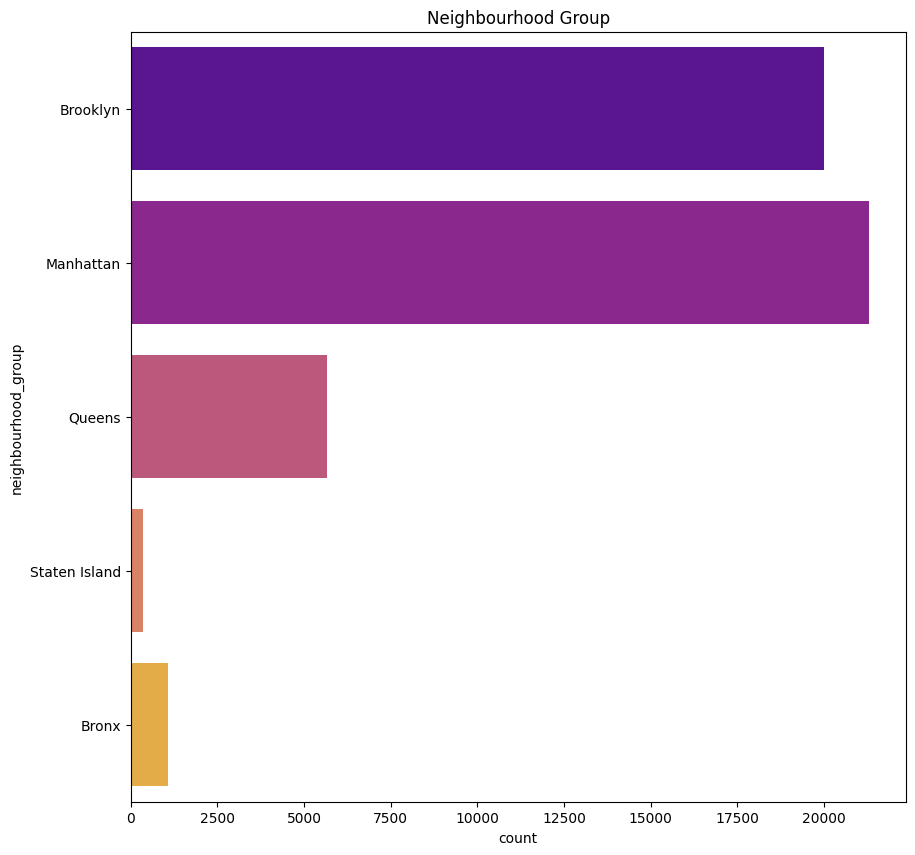

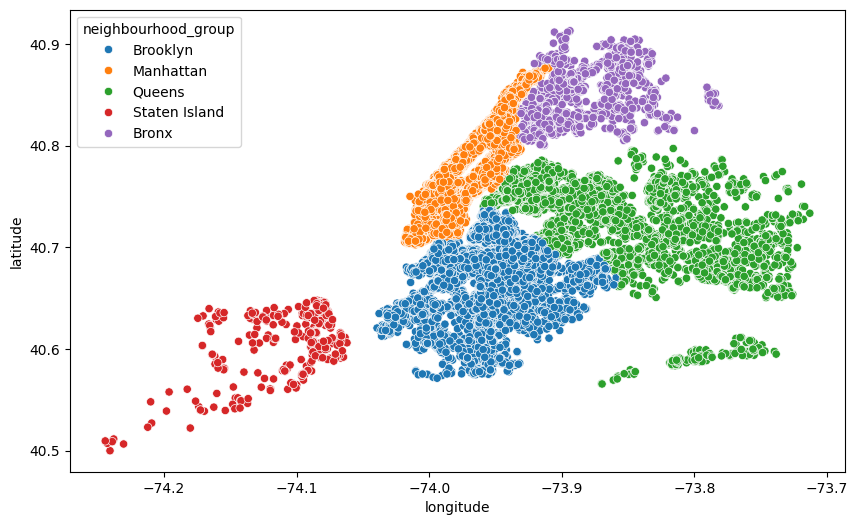

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group)
plt.ioff()
plt.show()

In [96]:
# Temporal patterns
df['last_review_month'] = df['last_review'].dt.month
recent_reviews = df['last_review_month'].value_counts().sort_index()
recent_reviews.plot(kind='bar', title='Reviews by Month')

# Hypothesis: Are prices higher in Manhattan?
manhattan = df[df['neighbourhood_group'] == 'Manhattan']['price']
other = df[df['neighbourhood_group'] != 'Manhattan']['price']
print("Mean price Manhattan vs Others:", manhattan.mean(), other.mean())


Mean price Manhattan vs Others: 172.3645456679972 109.75095912645713


### WordCloud

In [63]:
from wordcloud import WordCloud

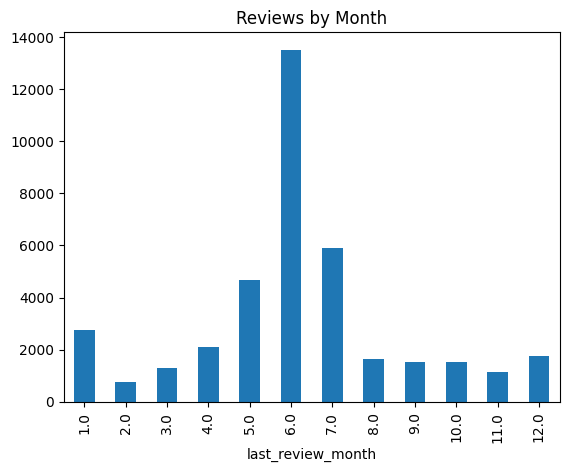

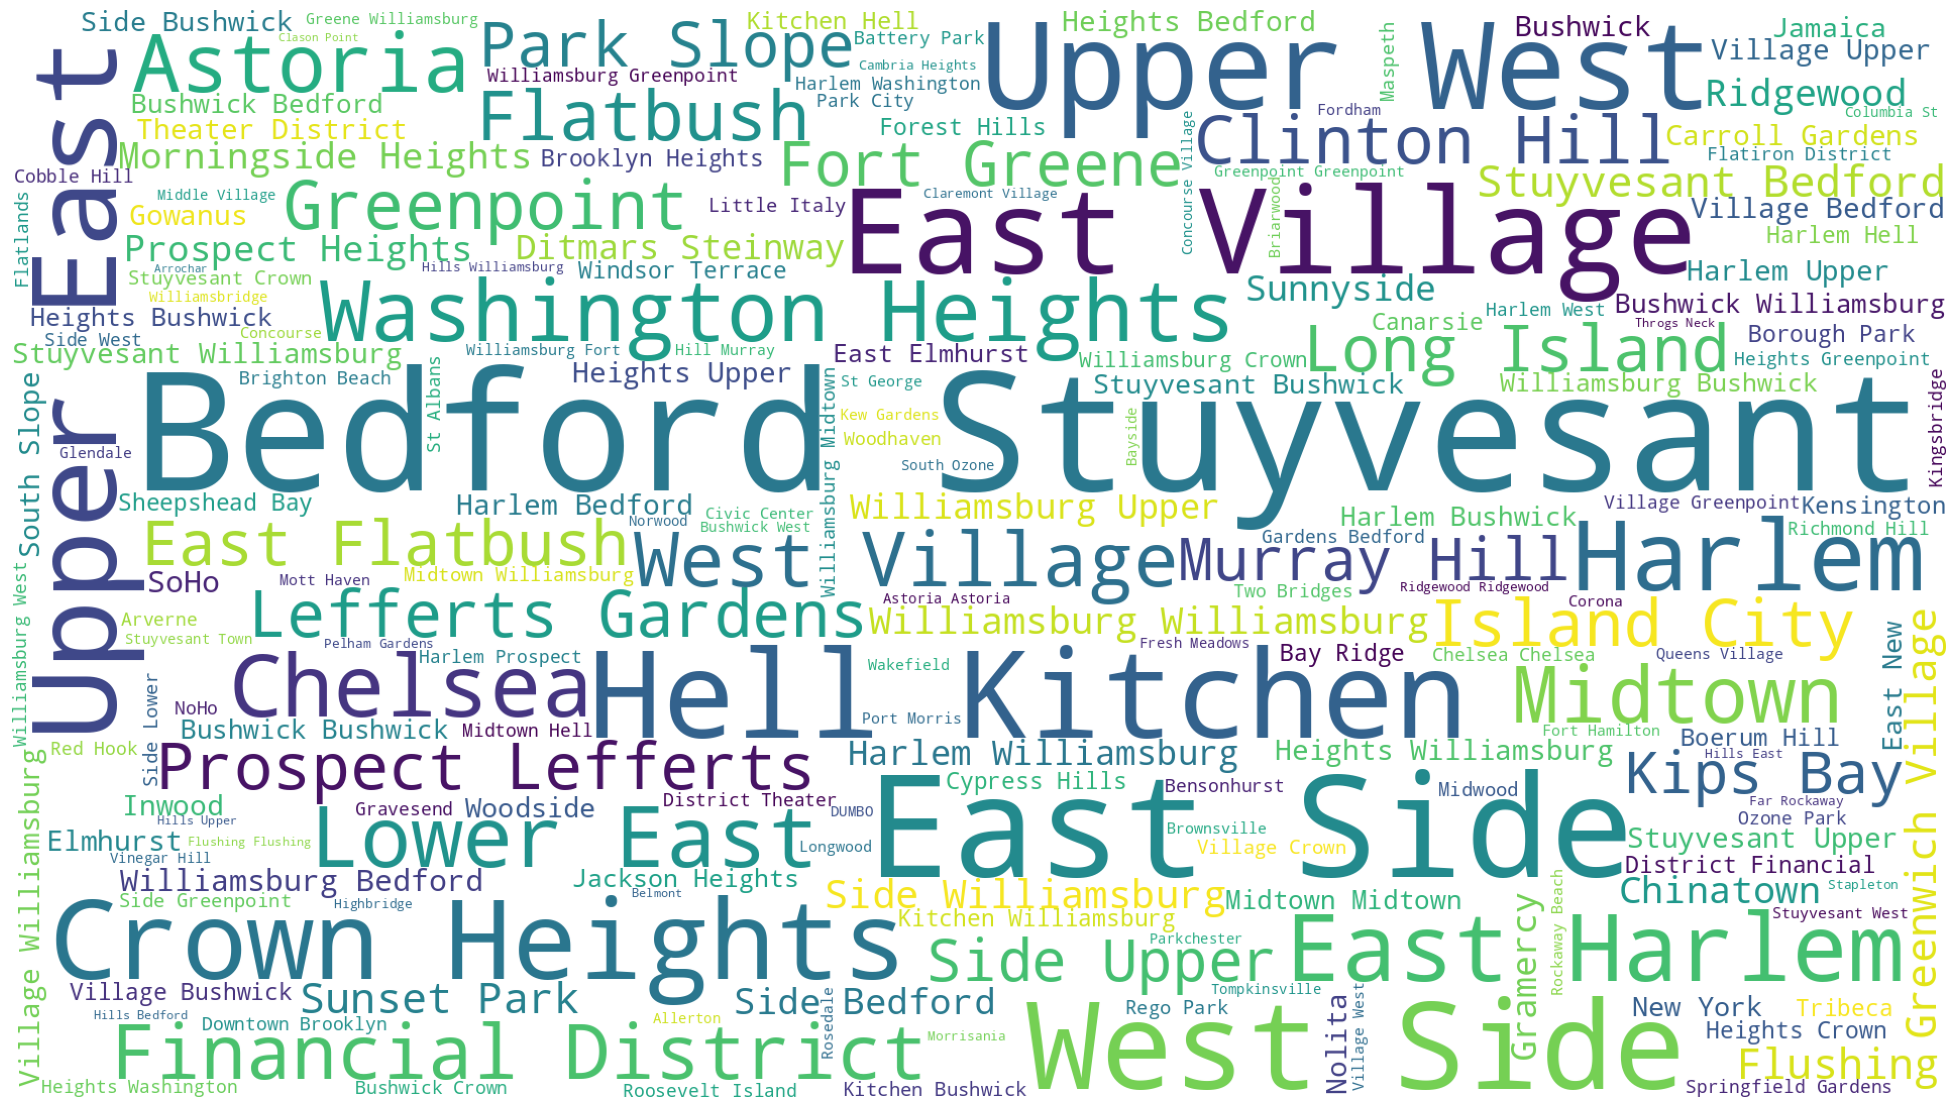

In [64]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

## Plotting the dataset in a map

Since according to the dataset we have been provided with the latitude and longitude so we will use folium libraries to present the data into a map. This map can be zoomed and the individual locations can be viewed in detail. I have used the zoom start to 9 so that the clusters can be visible.

In [65]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=10) # Increased zoom_start for a smaller view
FastMarkerCluster(data=locations).add_to(map1)
map1

# Top 5 host

Based on the review score(Minimum 50) we will plot, who is our top 5 Host, this increases the confidence of tourist before booking.

Also lets plot based on the lattitude and location of our review data.

In [66]:
map1=folium.Map([40.7128,-74.0080],zoom_start=9.8)
location = ['latitude','longitude']
review_50 = df[df['number_of_reviews']>=50]
df = review_50[location]
HeatMap(df.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(map1)
map1